In [10]:
%pip install sklearn

In [11]:
# imports for using the notebook

import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import genfromtxt
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, FeatureAgglomeration
from sklearn.decomposition import PCA
import seaborn as sns

In [12]:
new_politics = shorten_and_clean_dataset('../data/scrapes/politics.csv', 'comment_text',50)
author_dictionary = {}
for author, comment in zip(new_politics['comment_author'],new_politics['short']):
    if author not in author_dictionary.keys():
        author_dictionary[author] = ''
        author_dictionary[author] += comment
    else:
        author_dictionary[author] += ' '+comment
    author_dictionary[author] += ' '

comments = embed_comments(list(author_dictionary.values()))

lowering done! 
Contractions removed!
urls away!
htmls too!
asciis outta here!
special  characs done
puncts done
long one...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
print(len(author_dictionary.keys()), len(comments))

for author, comment in zip(author_dictionary.keys(), comments):
    author_dictionary[author] = comment

10384 10384


In [14]:
df_politics = pd.read_csv('../data/scrapes/politics.csv')

In [15]:
def reduce_dims_and_kmeans(user_embedding_pairs, num_of_dimensions):
    '''
    Current version only works w 2 colors. 
    '''
    # Set PCA to desired number of dimensions
    pca = PCA(n_components=num_of_dimensions)


    pca_embeddings = pca.fit_transform(list(user_embedding_pairs.values()))

    kmeans = KMeans(n_clusters=2, random_state=0) 

    classes = kmeans.fit_predict(pca_embeddings)


    label_color_map = {0 : 'r',1 : 'g'}
    label_color = [label_color_map[l] for l in classes]
    plt.scatter(pca_embeddings[:,0], pca_embeddings[:,1], c=label_color)

def reduce_to_one_dimension_kmeans(user_embedding_pairs):
    '''
    Current version only works w 2 colors. 
    '''
    # Set PCA to desired number of dimensions
    pca = PCA(n_components=1)


    pca_embeddings = pca.fit_transform(list(user_embedding_pairs.values()))

    kmeans = KMeans(n_clusters=2, random_state=0) 

    classes = kmeans.fit_predict(pca_embeddings)

    return (user_embedding_pairs.keys(), pca_embeddings)



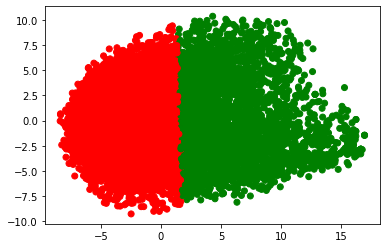

In [16]:
reduce_dims_and_kmeans(author_dictionary, 2)
# politics_user_embeddings = pair_users_embeddings(df_politics, author_dictionary, True)
Squeem = reduce_to_one_dimension_kmeans(author_dictionary)

In [17]:
comments

array([[-0.05537141,  0.96422493,  0.73597497, ...,  0.07963701,
        -0.96809137,  0.5713529 ],
       [-0.7286533 ,  0.5325911 ,  0.44001243, ...,  0.19259712,
         0.31844947,  0.26747343],
       [-0.6782428 ,  1.0646708 , -0.23234943, ...,  0.2357569 ,
        -0.37222716,  0.578168  ],
       ...,
       [-0.23709862,  0.6179166 ,  1.749972  , ..., -0.15047759,
        -0.8624368 ,  0.21919377],
       [-0.06812458,  0.14479832, -0.11882783, ..., -0.59579414,
        -0.13420695,  0.23603296],
       [-0.49058414,  0.74129635,  0.2072343 , ...,  0.5118741 ,
        -0.56183094,  0.09581841]], dtype=float32)

In [18]:
Squeem

(dict_keys(['AutoModerator', 'PandaMuffin1', 'Dagonet_the_Motley', 'lufecaep', 'FortySixAndYou', 'Shattered_Visage', 'byndrsn', 'RicardoMultiball', 'Mikesaidit36', 'Marathon2021', 'taez555', 'workingtoward', 'Scorpion1024', 'Jump_Yossarian_', 'DirtyDeedsDunderKeep', 'geoffbowman', 'PDXalreadtused', 'Zauberer-IMDB', 'Thisisntmyaccount24', 'OregonTripleBeam', 'natebrune', 'Lolareyouforreal', 'OppositeDifference', 'dawgblogit', 'all_of_the_lightss', 'Certain-Tough-6944', 'sugarlessdeathbear', 'BillMillerBBQ', 'perfectbebop', 'Substantial_Joke8624', 'weezer-hash-pipe', 'Deja-Vuz', 'broniesnstuff', 'mytb38', 'xnolmtsx', 'Busman123', 'CurrencyCommercial40', 'DontGetUpGentlemen', 'FictionVent', 'sadandgladpp', 'turlian', 'AllPinkEvverything', 'Farttopower', 'PrettiKinx', 'BoKnows8', 'captaincanada84', 'lurkinganon12345', 'LoganRoyKent', 'nc1264', 'TheINTL', 'crazybehind', 'eaunoway', 'ninthtale', 'boston_shua', '-flame-retardant-', 'whoknows234', 'fatFire_TA', 'Merari01', 'Think-Gur3538', 'Ic